In [1]:
import altair as alt
import pandas as pd

In [2]:
candidatos = pd.read_excel('./data/interim/candidatos_2018_minimo.xlsx')
candidatos.head()

,NR_TURNO,SG_UF,DS_CARGO,NR_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO
0,1,AC,DEPUTADO FEDERAL,5555,MARIVALDO MELO,PSD,Mudança e Competência 1,PP / PSDB / PSD / MDB / DEM / SOLIDARIEDADE / ...,54,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,EMPRESÁRIO,SUPLENTE
1,1,AC,DEPUTADO ESTADUAL,50000,RONY CARTOLIN,PSOL,"FRENTE - PSOL, PV, PRP E PPL",PSOL / PV / PRP / PPL,30,MASCULINO,SUPERIOR INCOMPLETO,SOLTEIRO(A),INDÍGENA,DETETIVE PARTICULAR,SUPLENTE
2,1,AC,DEPUTADO ESTADUAL,14222,ANDRÉA PÚPIO,PTB,PARTIDO ISOLADO,PTB,39,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BRANCA,AGENTE ADMINISTRATIVO,SUPLENTE
3,1,AC,DEPUTADO FEDERAL,7777,DRA. VANDA MILANI,SOLIDARIEDADE,Mudança e Competência 1,PP / PSDB / PSD / MDB / DEM / SOLIDARIEDADE / ...,65,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,MAGISTRADO,ELEITO POR QP
4,1,AC,DEPUTADO ESTADUAL,19019,JOSA DA FARMACIA,PODE,FRENTE POPULAR REPUBLICANA SOCIAL,PROS / PODE / PRB,45,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,DEPUTADO,ELEITO POR QP


In [99]:
(
    candidatos
    .loc[lambda df: df.NR_TURNO == 1]
    .groupby('DS_CARGO')
    .size()
    .rename('TOTAL')
    .reset_index()
    .sort_values(['TOTAL', 'DS_CARGO'], ascending=[True, False])
)

,DS_CARGO,TOTAL
9,VICE-PRESIDENTE,13
6,PRESIDENTE,13
5,GOVERNADOR,183
8,VICE-GOVERNADOR,184
7,SENADOR,310
0,1º SUPLENTE,313
1,2º SUPLENTE,314
2,DEPUTADO DISTRITAL,888
4,DEPUTADO FEDERAL,7626
3,DEPUTADO ESTADUAL,16112


In [109]:
(
    candidatos
    .loc[lambda df: df.NR_TURNO == 1]
    .loc[lambda df: df.DS_CARGO.str.contains('GOVERNADOR')]
    .loc[lambda df: df.SG_UF == 'RO', [
        'SG_PARTIDO',
        'NM_COLIGACAO',
        'DS_CARGO',
        'NM_URNA_CANDIDATO'
    ]]
    .sort_values(['NM_COLIGACAO', 'DS_CARGO'])
)

,SG_PARTIDO,NM_COLIGACAO,DS_CARGO,NM_URNA_CANDIDATO
24652,DC,JUNTOS POR UM NOVO TEMPO PARA RONDONIA,VICE-GOVERNADOR,NEODI
12584,PRTB,PARTIDO ISOLADO,GOVERNADOR,CORONEL CHARLON
15876,PSL,PARTIDO ISOLADO,GOVERNADOR,CORONEL MARCOS ROCHA
10333,PSL,PARTIDO ISOLADO,VICE-GOVERNADOR,ZE JODAN
14556,PRTB,PARTIDO ISOLADO,VICE-GOVERNADOR,CORONEL ALEXANDRE
19326,REDE,POR UMA RONDÔNIA QUE QUEREMOS,GOVERNADOR,VINICIUS MIGUEL
18389,PPS,POR UMA RONDÔNIA QUE QUEREMOS,VICE-GOVERNADOR,JAYME GILMAR KALB
5544,MDB,"RONDONIA, UNIDOS SOMOS FORTES",GOVERNADOR,MAURAO DE CARVALHO
17269,MDB,"RONDONIA, UNIDOS SOMOS FORTES",VICE-GOVERNADOR,WAGNER GARCIA
20880,PSDB,"RONDÔNIA, ESPERANÇA DE UM NOVO TEMPO",GOVERNADOR,EXPEDITO JUNIOR


## Representatividade nos partidos

### Número de candidatos por partido

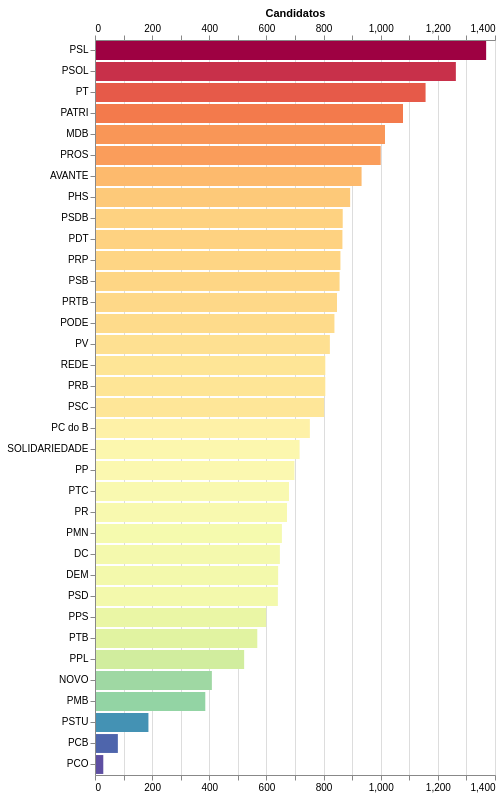

In [73]:
base = alt.Chart(
    candidatos
    .loc[lambda df: df.NR_TURNO == 1]
    .groupby('SG_PARTIDO')
    .size()
    .rename('TOTAL')
    .reset_index()
)

alt.layer(
    base
    .mark_bar()
    .encode(
        x=alt.X('TOTAL:Q', title=None),
        y=alt.Y('SG_PARTIDO:N', title=None, sort=alt.EncodingSortField(
            field='TOTAL', op='mean', order='descending'
        )),
        color=alt.Color(
            'TOTAL:Q',
            sort='descending',
            legend=None,
            scale=alt.Scale(scheme='spectral')
        ),
    ),

    base
    .mark_bar()
    .encode(x=alt.X('TOTAL:Q', axis=alt.Axis(orient='top', title='Candidatos')))
).resolve_scale(x='independent')

In [88]:
(
    candidatos
    .loc[lambda df: df.DS_SIT_TOT_TURNO.str.startswith('ELEITO')]
    .groupby('DS_CARGO')
    .size()
)

DS_CARGO
1º SUPLENTE             54
2º SUPLENTE             54
DEPUTADO DISTRITAL      24
DEPUTADO ESTADUAL     1035
DEPUTADO FEDERAL       513
GOVERNADOR              27
PRESIDENTE               1
SENADOR                 54
VICE-GOVERNADOR         27
VICE-PRESIDENTE          1
dtype: int64

In [75]:
candidatos.DS_SIT_TOT_TURNO.unique()

array(['SUPLENTE', 'ELEITO POR QP', 'NÃO ELEITO', 'ELEITO POR MÉDIA',
       'ELEITO', '2º TURNO'], dtype=object)

### Proporção de gênero por partido

### Proporção de raça por partido

In [2]:
df = pd.read_excel('./data/interim/candidatos_2018.xlsx')

In [9]:
df.DS_DETALHE_SITUACAO_CAND.unique()

array(['DEFERIDO', 'INDEFERIDO', 'INDEFERIDO COM RECURSO', 'RENÚNCIA',
       'DEFERIDO COM RECURSO', 'CANCELADO', 'NÃO CONHECIMENTO DO PEDIDO',
       'FALECIDO', 'PENDENTE DE JULGAMENTO'], dtype=object)

In [16]:
df[df.DS_DETALHE_SITUACAO_CAND.isin({
    'INDEFERIDO',
    'RENÚNCIA',
    'CANCELADO',
    'NÃO CONHECIMENTO DO PEDIDO',
    'FALECIDO',
    'PENDENTE DE JULGAMENTO',
})][[
    'SG_UF',
    'SG_PARTIDO',
    'NM_URNA_CANDIDATO',
    'DS_CARGO',
    'DS_DETALHE_SITUACAO_CAND',
]]

,SG_UF,SG_PARTIDO,NM_URNA_CANDIDATO,DS_CARGO,DS_DETALHE_SITUACAO_CAND
3,AC,DC,JOÃO DA ONÇA,DEPUTADO ESTADUAL,INDEFERIDO
18,AC,DC,DEUZIMAR MENDONÇA,DEPUTADO ESTADUAL,INDEFERIDO
52,AC,PATRI,LUIZ HASSEM,1º SUPLENTE,RENÚNCIA
56,AC,PSD,ROSILDO CASSIANO,DEPUTADO ESTADUAL,INDEFERIDO
60,AC,MDB,CLEIDSON ROCHA,DEPUTADO ESTADUAL,INDEFERIDO
92,AC,PSL,GILBERTO DINIZ,DEPUTADO ESTADUAL,INDEFERIDO
125,AC,PP,RUBERLÂNDIA,DEPUTADO ESTADUAL,INDEFERIDO
134,AC,DC,PR. NALDO,DEPUTADO ESTADUAL,RENÚNCIA
137,AC,PRB,EDSON ARAUJO,DEPUTADO ESTADUAL,RENÚNCIA
151,AC,PSDB,ENFERMEIRA RIZANE,DEPUTADO ESTADUAL,RENÚNCIA
